# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

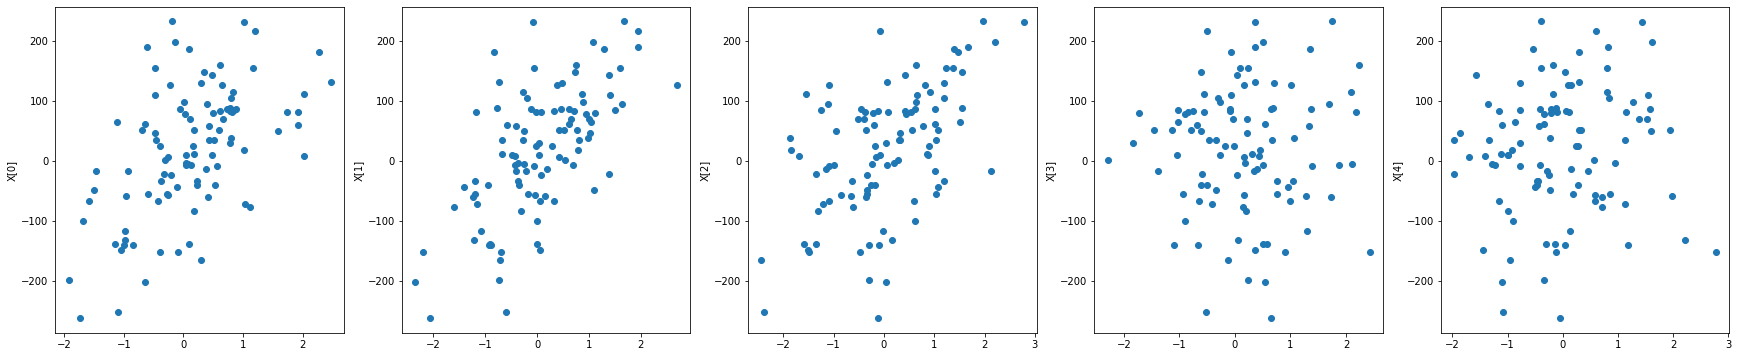

In [40]:
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(1,5, figsize=(30,6))
for i in range(5):
  axis[i].scatter(X[:,i],y)
  m, b = np.polyfit(X[:,i], y, 1)
#   axis[i].plot(X[:,i],m*X[:,i]+b, color = "red")
  axis[i].set(ylabel = "X[{}]".format(i))


# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [41]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [43]:

# def build_model(normalizer):
model = keras.Sequential([
    layers.Dense(5,activation='relu', input_shape=[5]),
    layers.Dense(5,activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.001), metrics=[tf.keras.metrics.MeanSquaredError()])

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

model.summary()

# Your code here
# history.history

Epoch 1/100
2/2 [==============================] - 0s 92ms/step - loss: 12584.7773 - mean_squared_error: 12584.7773 - val_loss: 7190.8931 - val_mean_squared_error: 7190.8931
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 12570.1523 - mean_squared_error: 12570.1523 - val_loss: 7185.4233 - val_mean_squared_error: 7185.4233
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 12552.3379 - mean_squared_error: 12552.3379 - val_loss: 7174.5400 - val_mean_squared_error: 7174.5400
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 12521.6270 - mean_squared_error: 12521.6270 - val_loss: 7158.1328 - val_mean_squared_error: 7158.1328
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 12455.6768 - mean_squared_error: 12455.6768 - val_loss: 7121.3408 - val_mean_squared_error: 7121.3408
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 12305.1680 - mean_squared_error: 12305.1680 - val_loss: 70

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

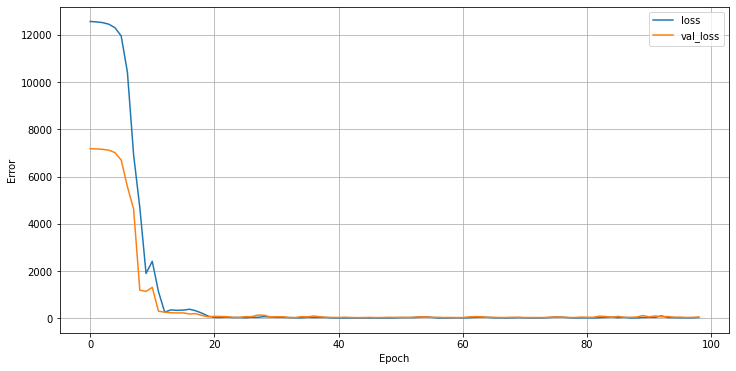

In [44]:
# Your code here

# def plot_loss(history):
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'][1:], label='loss')
plt.plot(history.history['val_loss'][1:], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [45]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


In [46]:
from sklearn.metrics import r2_score

def mean_squared_error(y_true, y_pred):
       y2 = np.array([[item] for item in y_true])
       return np.sum(np.square(y2-y_pred))/y_true.size

mse = mean_squared_error(y_test,pred)
print("MSE:", mse)

accu = r2_score(y_test,pred)
print("Accuracy:", accu)

MSE: 65.00712545545183
Accuracy: 0.993608768500502


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [48]:
# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

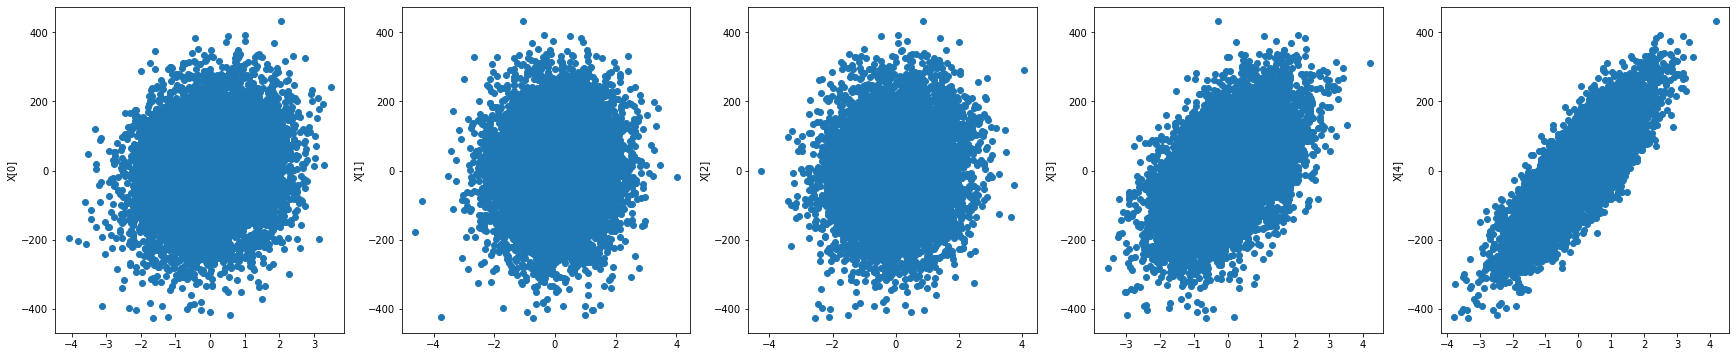

In [49]:
figure, axis = plt.subplots(1,5, figsize=(30,6))
for i in range(5):
  axis[i].scatter(X[:,i],y)
  m, b = np.polyfit(X[:,i], y, 1)
#   axis[i].plot(X[:,i],m*X[:,i]+b, color = "red")
  axis[i].set(ylabel = "X[{}]".format(i))


In [51]:
model2 = keras.Sequential([
    layers.Dense(5,activation='relu', input_shape=[5]),
    layers.Dense(3,activation='relu'),
    layers.Dense(1)
])

model2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

history2 = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=60,
    verbose=1)

model2.summary()

Epoch 1/60
200/200 [==============================] - 1s 1ms/step - loss: 13643.7598 - mean_squared_error: 13643.7598 - val_loss: 14147.1328 - val_mean_squared_error: 14147.1328
Epoch 2/60
200/200 [==============================] - 0s 1ms/step - loss: 13413.0059 - mean_squared_error: 13413.0059 - val_loss: 13688.1904 - val_mean_squared_error: 13688.1904
Epoch 3/60
200/200 [==============================] - 0s 838us/step - loss: 12677.4180 - mean_squared_error: 12677.4180 - val_loss: 12571.5771 - val_mean_squared_error: 12571.5771
Epoch 4/60
200/200 [==============================] - 0s 822us/step - loss: 11245.4766 - mean_squared_error: 11245.4766 - val_loss: 10681.6484 - val_mean_squared_error: 10681.6484
Epoch 5/60
200/200 [==============================] - 0s 2ms/step - loss: 9061.0938 - mean_squared_error: 9061.0938 - val_loss: 8078.5439 - val_mean_squared_error: 8078.5439
Epoch 6/60
200/200 [==============================] - 0s 972us/step - loss: 6427.8501 - mean_squared_error: 64

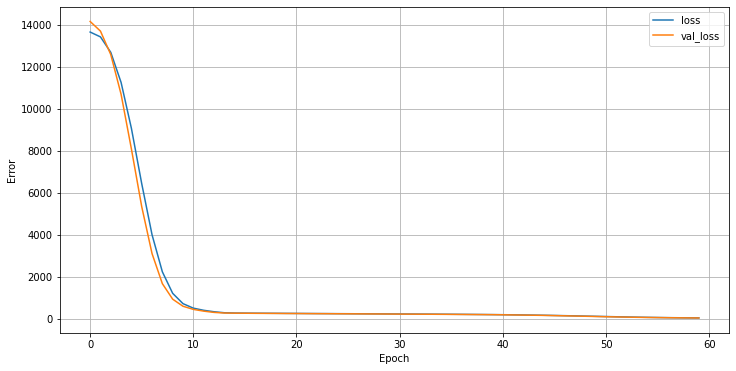

In [53]:
plt.figure(figsize=(12,6))
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [55]:
pred2 = model2.predict(X_test)

from sklearn.metrics import r2_score

def mean_squared_error(y_true, y_pred):
       y2 = np.array([[item] for item in y_true])
       return np.sum(np.square(y2-y_pred))/y_true.size

mse = mean_squared_error(y_test,pred2)
print("MSE:", mse)

accu = r2_score(y_test,pred2)
print("Accuracy:", accu)

63/63 [==============================] - 0s 772us/step
MSE: 37.23784216391974
Accuracy: 0.9973290893545408
